In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
insurance = pd.read_csv('logistic_regression\insurance_data.csv')
insurance

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


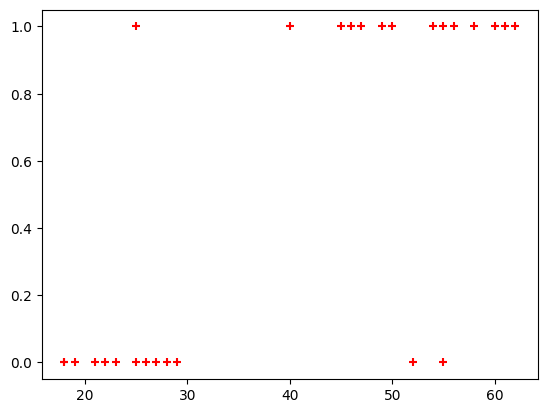

In [3]:
plt.scatter(insurance.age,insurance.bought_insurance,marker='+',color='red')

In [4]:
x = insurance[['age']]
y = insurance.bought_insurance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(insurance[['age']],insurance.bought_insurance,train_size=0.8)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [6]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 0], dtype=int64)

In [7]:
y_test

20    0
0     0
25    1
14    1
11    0
1     0
Name: bought_insurance, dtype: int64

In [8]:
model.score(x_test,y_test)

1.0

Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2. Plot bar charts showing impact of employee salaries on retention

3. Plot bar charts showing corelation between department and employee retention

4. Now build logistic regression model using variables that were narrowed down in step 1

5. Measure the accuracy of the model

In [9]:
hr_data = pd.read_csv('logistic_regression\HR_comma_sep.csv')
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Exploration and Visualisation

In [13]:
hr_data[hr_data.left==1].shape

(3571, 10)

In [14]:
hr_data[hr_data.left==0].shape

(11428, 10)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hr_edata = hr_data.copy()
hr_edata['Department'] = le.fit_transform(hr_data['Department'])
hr_edata['salary'] = le.fit_transform(hr_data['salary'])
hr_edata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


<Axes: >

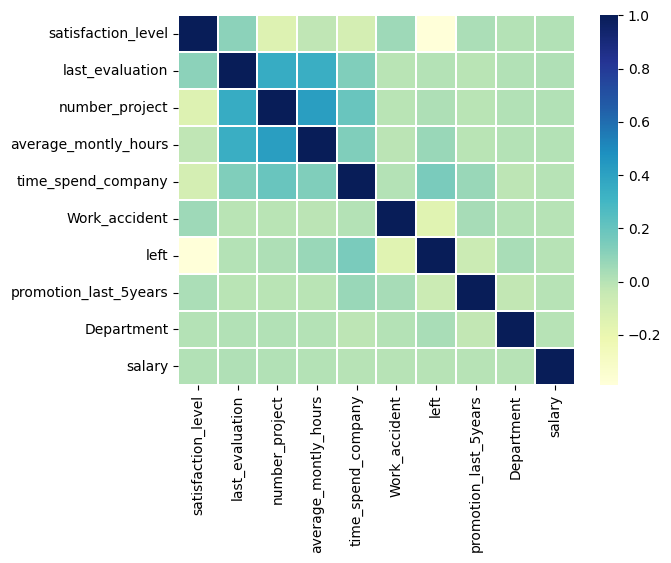

In [16]:
import seaborn as sns
sns.heatmap(hr_edata.corr(), cmap ="YlGnBu", linewidths = 0.1)

In [18]:
legend_1 = pd.DataFrame({'Original Labels': hr_data['salary'], 'Encoded Labels': hr_edata['salary']}).drop_duplicates().reset_index(drop=True)
print(legend_1)

  Original Labels  Encoded Labels
0             low               1
1          medium               2
2            high               0


In [19]:
legend_2 = pd.DataFrame({'Original Labels': hr_data['Department'], 'Encoded Labels': hr_edata['Department']}).drop_duplicates().reset_index(drop=True)
print(legend_2)

  Original Labels  Encoded Labels
0           sales               7
1      accounting               2
2              hr               3
3       technical               9
4         support               8
5      management               4
6              IT               0
7     product_mng               6
8       marketing               5
9           RandD               1


In [20]:
hr_edata.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


#### From above table we can draw following conclusions,

**1. Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**2. Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**3. Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<Axes: xlabel='salary'>

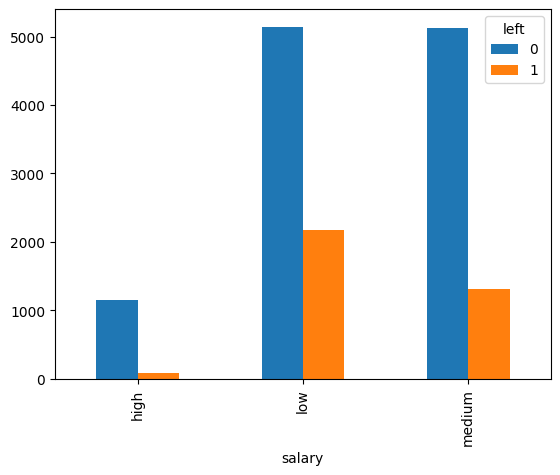

In [21]:
pd.crosstab(hr_data.salary,hr_data.left).plot(kind='bar')

From the graph above it is quite clear that the attrition rate amongst the employees with a low salary is high when compared to the ones with a higher salary.

<Axes: xlabel='Department'>

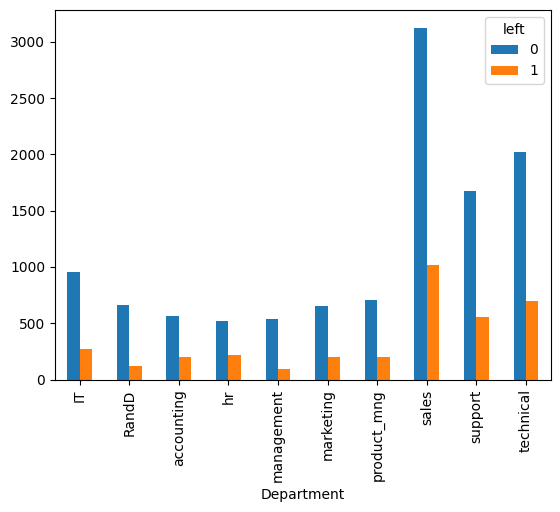

In [22]:
pd.crosstab(hr_data.Department,hr_data.left).plot(kind='bar')

We can say that the department of an employee doesn't impact much on the attrition rate.

#### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**1. Satisfaction Level**

**2. Average Monthly Hours**

**3. Promotion Last 5 Years**

**4. Salary**

In [23]:
x = hr_edata[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']].values
x

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [24]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(x)
X_encoded = np.delete(X_encoded, 0, axis=1)
X_encoded

array([[1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [25]:
y = hr_edata.left.values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2)

In [27]:
retention_model = LogisticRegression()
retention_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
retention_model.score(x_test,y_test)

0.7736666666666666